In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [6]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

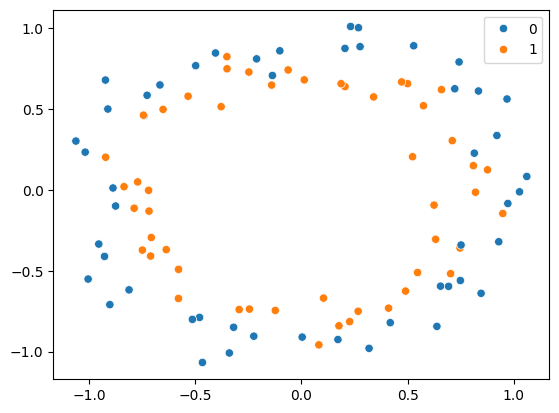

In [7]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [141]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [142]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=1)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 32ms/step - loss: 0.1856 - accuracy: 0.9125 - val_loss: 0.6905 - val_accuracy: 0.6500
Epoch 1002/3500
3/3 [==============================] - 0s 22ms/step - loss: 0.1850 - accuracy: 0.9125 - val_loss: 0.6901 - val_accuracy: 0.6500
Epoch 1003/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.1861 - accuracy: 0.9125 - val_loss: 0.6906 - val_accuracy: 0.6500
Epoch 1004/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.1859 - accuracy: 0.9125 - val_loss: 0.6871 - val_accuracy: 0.6500
Epoch 1005/3500
3/3 [==============================] - 0s 23ms/step - loss: 0.1849 - accuracy: 0.9125 - val_loss: 0.6843 - val_accuracy: 0.6500
Epoch 1006/3500
3/3 [==============================] - 0s 33ms/step - loss: 0.1854 - accuracy: 0.9125 - val_loss: 0.6815 - val_accuracy: 0.6500
Epoch 1007/3500
3/3 [==============================] - 0s 33ms/step - loss: 0.1855 - accuracy: 0.9125

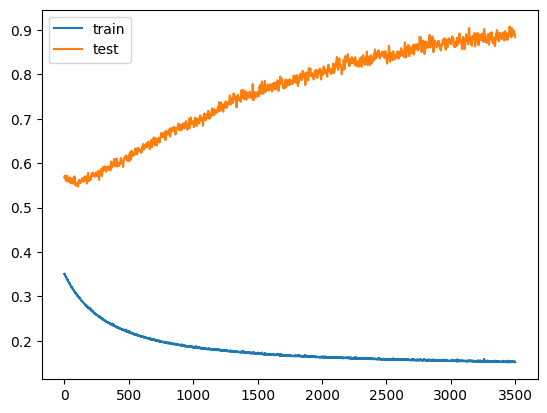

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 13s 1ms/step


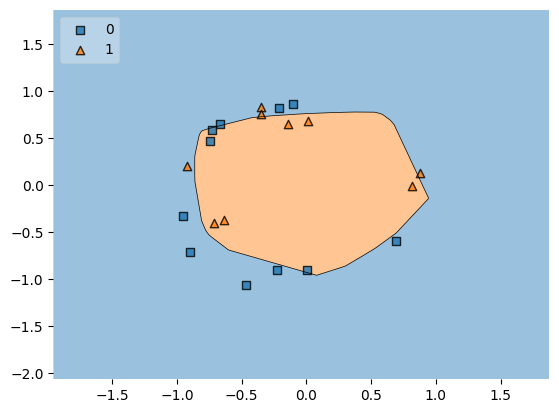

In [24]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

If the number of epochs is large, **validation_loss** should have **decreased** as the gradient converges but instead it starts increasing due to **overfitting**

# Early Stopping

In [10]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=False
)

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 43ms/step - loss: 0.6736 - accuracy: 0.5750 - val_loss: 0.7163 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6734 - accuracy: 0.5750 - val_loss: 0.7175 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6722 - accuracy: 0.5750 - val_loss: 0.7176 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.6716 - accuracy: 0.5625 - val_loss: 0.7179 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 26ms/step - loss: 0.6711 - accuracy: 0.5750 - val_loss: 0.7181 - val_accuracy: 0.4500
Epoch 6/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6703 - accuracy: 0.6000 - val_loss: 0.7184 - val_accuracy: 0.4500
Epoch 7/3500
3/3 [==============================] - 0s 26ms/step - loss: 0.6698 - accuracy: 0.6000 - val_loss: 0.7188 - val_accuracy: 0.4500
Epoch 8/3500


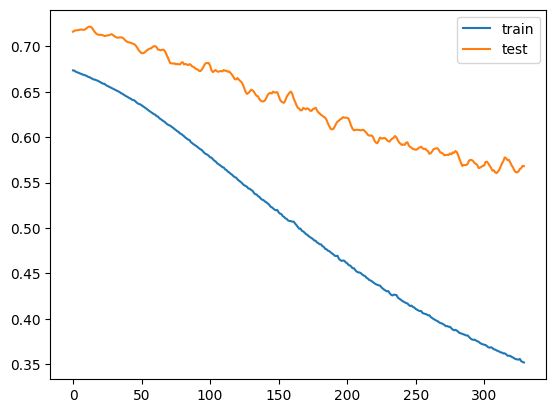

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

After applying **callback**, the validation loss converges and the fitting stops at the epoch where the validation_loss stops reducing

9600/9600 [==============================] - 13s 1ms/step


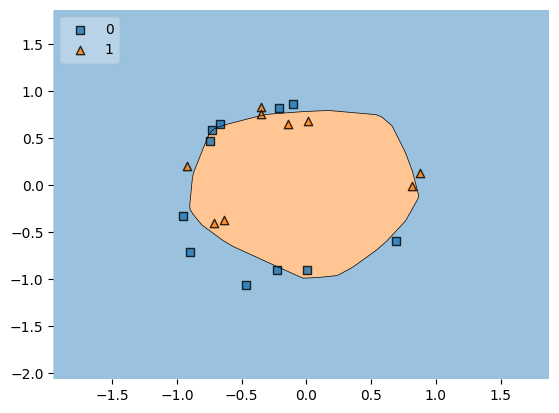

In [19]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()